In [1]:
.libPaths('/root/miniconda3/envs/Rdoc/lib/R/library')

In [3]:
library(scran)

In [10]:
library(SpatialExperiment)

In [4]:
biggene = c('CD14','CD4','CD8a','FAP','Vimentin','HLA-DR','FoxP3',
           'CD68','CD20','CD3')

In [22]:
spe = readRDS('after.spe.rds')

In [23]:
library(bluster)
library(BiocParallel)
library(ggplot2)

In [24]:
library(dittoSeq)

In [27]:
spe1= spe[,!spe$celltype %in% c('unlabel')]

In [32]:
unique(spe1$celltype)

[1] Myeloid CD4t    B       Tregs   MSCs    DCs     CD8t   
Levels: unlabel Myeloid CD4t B Tregs MSCs DCs CD8t

In [33]:
spe1$celltype = factor(spe1$celltype,levels = c('Myeloid','CD4t','B','Tregs','MSCs','DCs','CD8t'))

In [34]:
library(ggsci)

In [35]:
spe = spe1

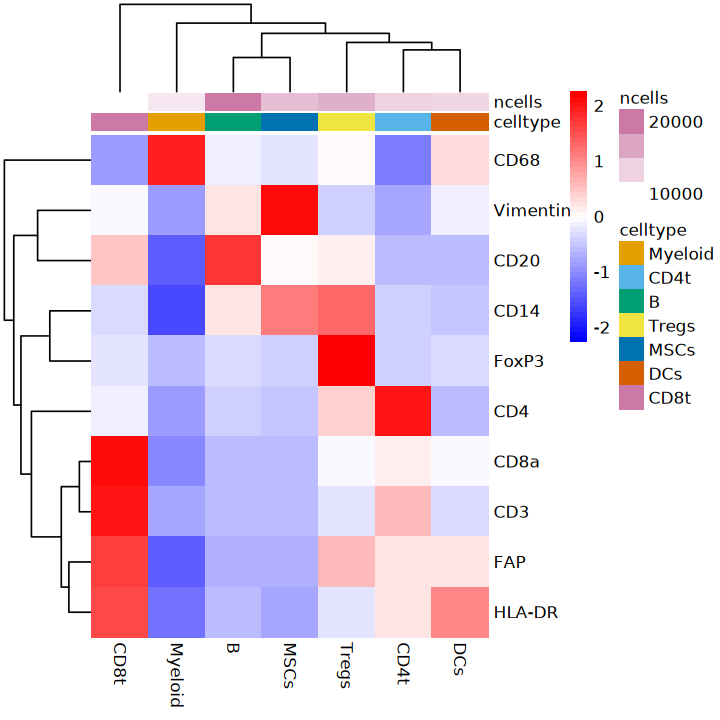

In [40]:
library(scuttle)

## aggregate by cell type
celltype_mean <- aggregateAcrossCells(as(spe, "SingleCellExperiment"),  
                     ids = spe$celltype, 
                     statistics = "mean",
                     use.assay.type = "exprs", 
                     subset.row = biggene)

library(dittoSeq)
library(colorspace)
library(viridis)

options(repr.plot.width = 6,repr.plot.height = 6)
p = dittoHeatmap(celltype_mean,
             assay = "exprs", 
             cluster_cols = TRUE, show_rownames = TRUE,show_colnames =TRUE,
             annot.by = c("celltype", "ncells"),
             annotation_colors = pal_npg("nrc")(10))

In [44]:
pdf('figure2.heat.pdf',width = 5,height = 5)
p
dev.off()

png 
  2

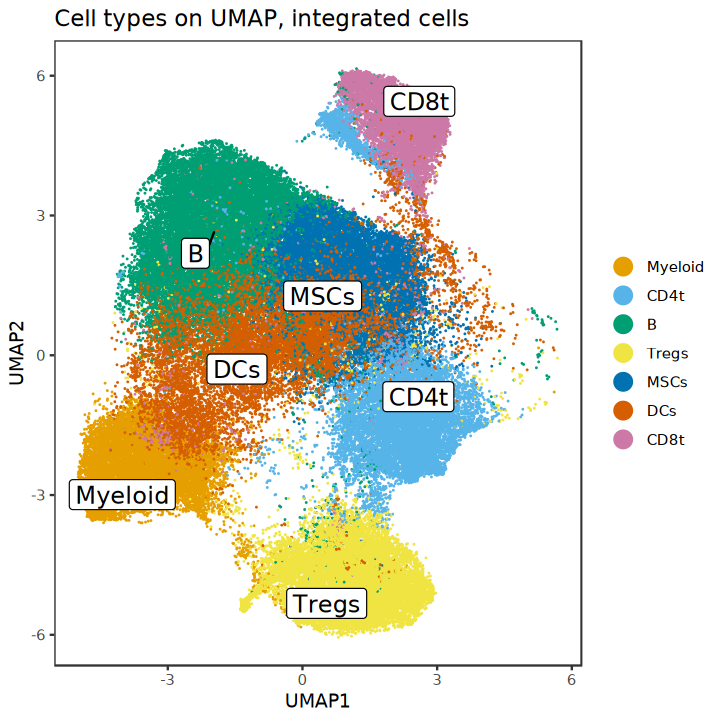

In [49]:
dittoDimPlot(spe, 
                   var = "celltype", 
                   reduction.use = "UMAP_mnnCorrected", 
                   size = 0.2,
                   do.label = TRUE) +
 # scale_color_manual(values = metadata(spe)$color_vectors$celltype) +
  theme(legend.title = element_blank()) +
  ggtitle("Cell types on UMAP, integrated cells")

In [50]:
ggsave('figure1.umap2.pdf',height = 5,width = 5)

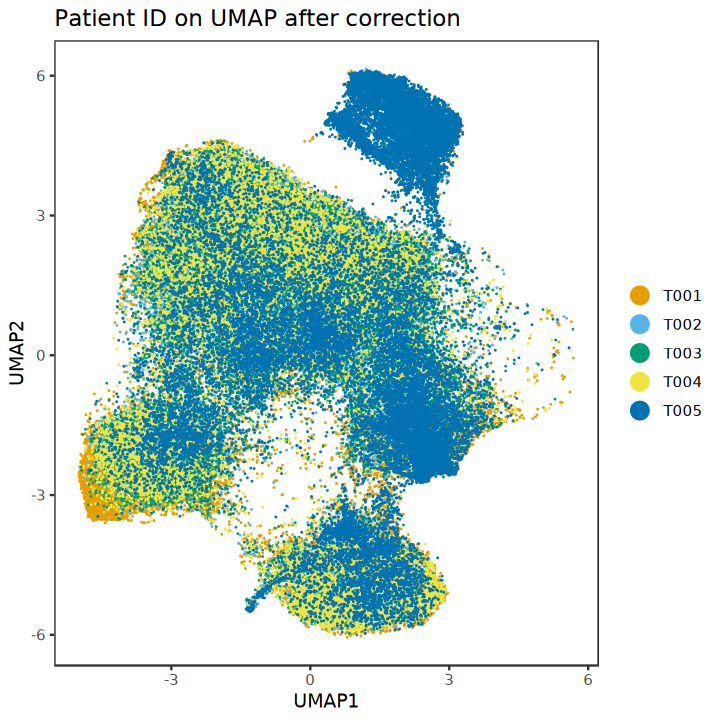

In [51]:
library(cowplot)
library(dittoSeq)
library(viridis)
dittoDimPlot(spe, var = "patient_id", 
                   reduction.use = "UMAP_mnnCorrected", size = 0.2) + 
   #scale_color_manual(values = metadata(spe)$color_vectors$patient_id) +
    ggtitle("Patient ID on UMAP after correction")

ggsave('figure1.umap3.pdf',height = 5,width = 5)

In [58]:
options(repr.plot.width = 5,repr.plot.height = 5)

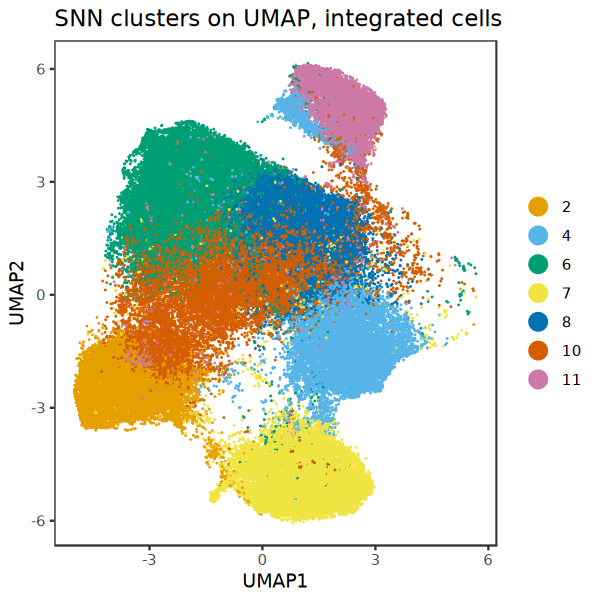

In [59]:
dittoDimPlot(spe, var = "nn_clusters_corrected", 
             reduction.use = "UMAP_mnnCorrected", size = 0.2,
             do.label = FALSE) +
    ggtitle("SNN clusters on UMAP, integrated cells")

ggsave('figure1.umap.pdf',height = 5,width = 5)

In [60]:
options(repr.plot.width = 9,repr.plot.height = 9)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

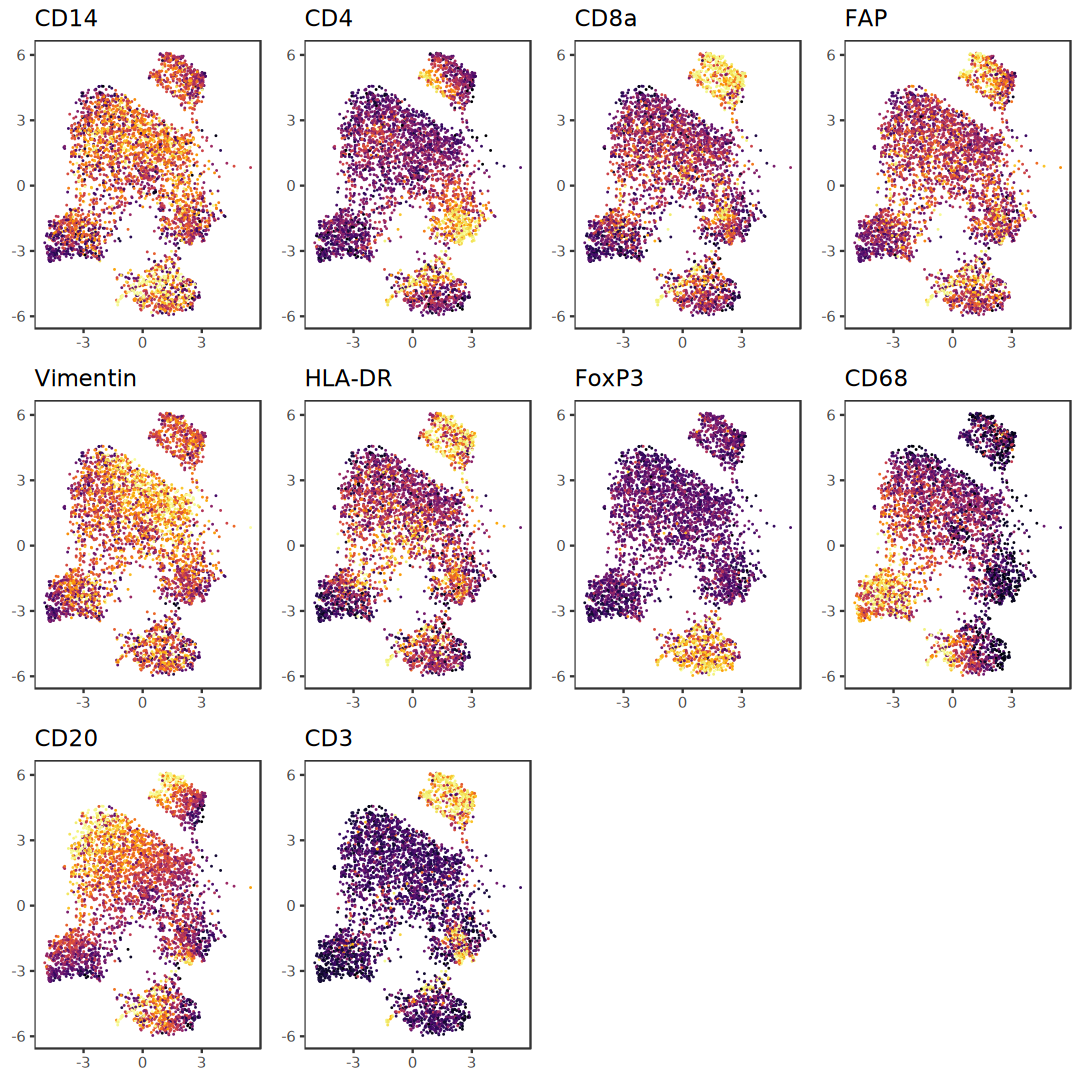

In [61]:
set.seed(220818)
cur_cells <- sample(seq_len(ncol(spe)), 4000)
plot_list <- multi_dittoDimPlot(spe[,cur_cells], var = biggene, reduction.use = "UMAP_mnnCorrected", 
                   assay = "exprs", size = 0.2, list.out = TRUE) 
plot_list <- lapply(plot_list, function(x) x + scale_color_viridis(option = "B")  )
plot_grid(plotlist = plot_list) 

In [62]:
ggsave('figure1.umap4.pdf',height = 9,width = 9)

In [65]:
options(repr.plot.height = 5,repr.plot.width = 5)

In [67]:
p = dittoBarPlot(spe, 
             var = "celltype", 
             group.by = "patient_id") +
    scale_fill_manual(values = pal_npg("nrc")(9))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [68]:
pdf('figure2.barplot.pdf',width = 5,height = 5)
p
dev.off()

png 
  2

In [71]:
p1 = dittoBarPlot(spe, 
             scale = "count",
             var = "celltype", 
             group.by = "patient_id") +
    scale_fill_manual(values = pal_npg("nrc")(9))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [72]:
pdf('figure2.barplot2.pdf',width = 5,height = 5)
p1
dev.off()

png 
  2

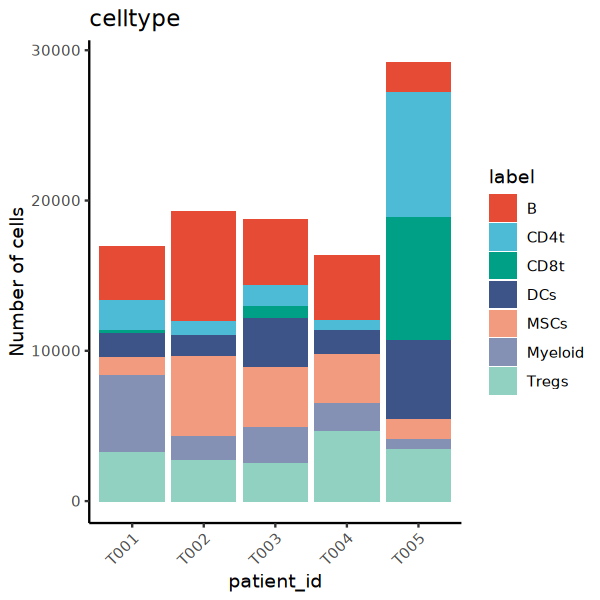

In [73]:
p1